In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [62]:
df_train=pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Survived column is our dependent feature and other are independent features

In [63]:
df_test= pd.read_csv("test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Feature Engineering 

In [64]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabin column having 687 null entries out of total 891 so better to remove it . Also Age we can change it to mean values coz only 177 are null.

In [66]:
df_train.drop('Cabin',axis=1,inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


we removed cabin column now we take care of age column. Now important thing is how age column is dependent on other features like passenger class. coz max from pclass3 died not from pclass1. So we need to do EDA on relationship btw them

<AxesSubplot:xlabel='Survived', ylabel='count'>

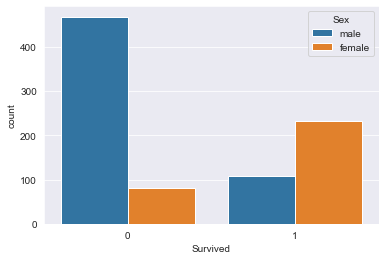

In [67]:
import seaborn as sns
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=df_train,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

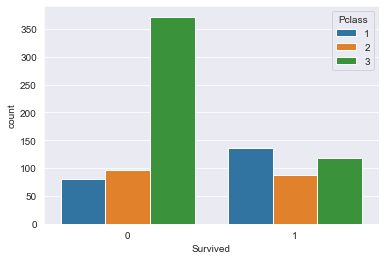

In [68]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=df_train,hue='Pclass')

we need to see how our age is distributed

C:\Users\AKSHAT RAI LADDHA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

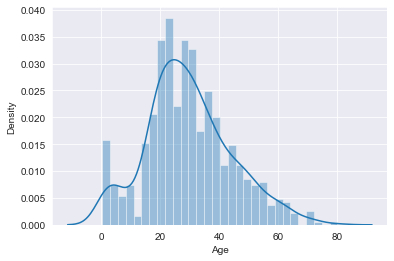

In [69]:
sns.distplot(df_train['Age'].dropna(),kde=True,bins=30)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

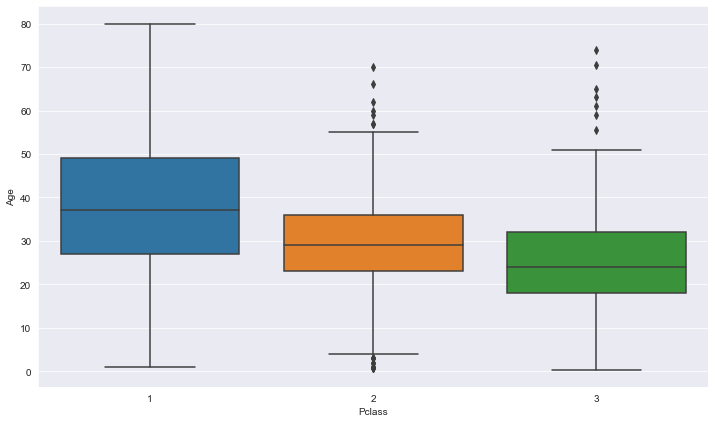

In [70]:
# Relationshiip of pclass and age
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df_train)

so for pclass1 median is around 37,pclass2 : 28 and pclass3 : 24. so we replace null values with these values considering pclass dependency on Age

In [71]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

now we have to apply this function using .apply(function_name)

In [72]:
df_train['Age']=df_train[['Age','Pclass']].apply(impute_age,axis=1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


we can see here all missing values from age column are taken care of.Now we will convert all categorical features into numerical data to get better results

In [73]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


we can change Sex, embarked columns into numerical data using get_dummies method of pandas. Columns like Ticket and Name are of no need as they dopn't give any info

In [74]:
embark=pd.get_dummies(df_train['Embarked'],drop_first=True)
sex=pd.get_dummies(df_train['Sex'],drop_first=True)
print(embark)
print(sex)

     Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
886  0  1
887  0  1
888  0  1
889  0  0
890  1  0

[891 rows x 2 columns]
     male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[891 rows x 1 columns]


In [75]:
df_train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [76]:
df_train=pd.concat([df_train,sex,embark],axis=1)
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [77]:
# no point of passesngerid as it's just count of passesngers or index value
df_train.drop(['PassengerId'],axis=1,inplace=True)
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [78]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [79]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

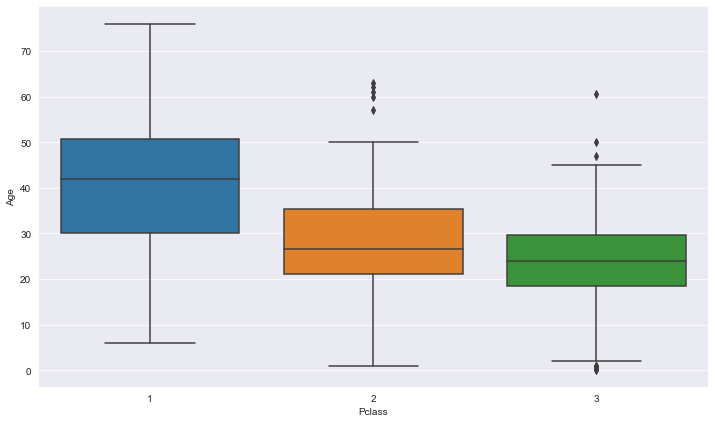

In [80]:

plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df_test)

In [81]:
def impute_age_test(cols):
    Age_test=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age_test):
        if Pclass==1:
            return 43
        elif Pclass==2:
            return 37
        else:
            return 34
    else:
        return Age_test

In [82]:
df_test['Age']=df_test[['Age','Pclass']].apply(impute_age_test,axis=1)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [83]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


We need to make our testing dataset similar to training dataset for model to work on same features in test and train data 

In [84]:
sex_test=pd.get_dummies(df_test['Sex'],drop_first=True)
embark_test=pd.get_dummies(df_test['Embarked'],drop_first=True)
print(sex_test)
print(embark_test)

# df_test.drop(['PassengerId','Name',])

     male
0       1
1       0
2       1
3       1
4       0
..    ...
413     1
414     0
415     1
416     1
417     1

[418 rows x 1 columns]
     Q  S
0    1  0
1    0  1
2    1  0
3    0  1
4    0  1
..  .. ..
413  0  1
414  0  0
415  0  1
416  0  1
417  0  0

[418 rows x 2 columns]


In [85]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [86]:
df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [87]:
df_test.drop(['PassengerId','Name','Sex','Embarked','Ticket'],axis=1,inplace=True)
df_test.head(2)

,Pclass,Age,SibSp,Parch,Fare,Cabin
0,3,34.5,0,0,7.8292,NaN
1,3,47.0,1,0,7.0000,NaN


In [88]:
df_train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


In [89]:
df_test=pd.concat([df_test,sex_test,embark_test],axis=1)
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,3,34.5,0,0,7.8292,NaN,1,1,0
1,3,47.0,1,0,7.0000,NaN,0,0,1
2,2,62.0,0,0,9.6875,NaN,1,1,0
3,3,27.0,0,0,8.6625,NaN,1,0,1
4,3,22.0,1,1,12.2875,NaN,0,0,1


In [90]:
df_train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


In [91]:
df_test.drop(['Cabin'],axis=1,inplace=True)
df_test.head(2)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1


Now we got both test and train dataset similar and ready for ml model to run on testing dataset

In [92]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(solver='liblinear')
# solver='liblinear'solved the issue with decoding problem in logistic regression
logmodel.fit(df_train.drop(['Survived'],axis=1),df_train['Survived'])

LogisticRegression(solver='liblinear')

In [93]:
fare_null=df_test[df_test['Fare'].isnull()]
fare_null

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
152,3,60.5,0,0,NaN,1,0,1


In [94]:
#avg fare of Pclass=3 
class3=df_test[df_test['Pclass']==3]
fare_avg=class3['Fare'].mean()
fare_avg

12.459677880184334

In [95]:
df_test['Fare']=df_test['Fare'].fillna(fare_avg)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    418 non-null    float64
 5   male    418 non-null    uint8  
 6   Q       418 non-null    uint8  
 7   S       418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 17.7 KB


now we can see that we don't have any null values and out df_test is ready to be tested against our logistric regression model

In [96]:
predictions=logmodel.predict(df_test)

In [97]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [99]:
# for submission we need Passengerid so taking that from test_data
df_test2=pd.read_csv('test.csv')
df_test2.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [100]:
# submission_df.to_csv("submission.csv", index=False)
# result: 76.315

Trying out other Algorithms : like Random Forest,Gradient boosting,KNN and SVM 

In [101]:
# from sklearn.ensemble import RandomForestClassifier
# random_classifier=RandomForestClassifier(n_estimators= 20, criterion="entropy")  
# random_classifier.fit(df_train.drop(['Survived'],axis=1),df_train['Survived'])  

In [102]:
# random_predictions=random_classifier.predict(df_test)
# random_predictions

In [103]:
# submission_df_random = pd.DataFrame({
#     "PassengerId": df_test2["PassengerId"],
#     "Survived": random_predictions
# })

In [104]:
# submission_df_random.to_csv("submission.csv", index=False)
# # result: 75.991 using random forest classifier with n_estimators=20

In [105]:
#Applying naive bayes
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [106]:
gnb.fit(df_train.drop(['Survived'],axis=1),df_train['Survived'])
predictions_gnb=gnb.predict(df_test)
#result: 75.358

In [107]:
mnb.fit(df_train.drop(['Survived'],axis=1),df_train['Survived'])
predictions_mnb=mnb.predict(df_test)
#result:6

In [108]:
bnb.fit(df_train.drop(['Survived'],axis=1),df_train['Survived'])
predictions_bnb=bnb.predict(df_test)

In [114]:
submission_df_bnb = pd.DataFrame({
    "PassengerId": df_test2["PassengerId"],
    "Survived": predictions_bnb
})

In [115]:
submission_df_bnb.to_csv("submission_bnb.csv", index=False)

In [ ]:
# from sklearn.metrics import confusion_matrix,accuracy_score
# evaluation=confusion_matrix(y_test,predictions)
# print(evaluation)

In [ ]:
# accuracy=accuracy_score(y_test,predictions)
# accuracy

In [ ]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test,predictions))

In [ ]:
# from sklearn.ensemble import RandomForestClassifier



# features = ["Pclass","Age","SibSp","Parch","Fare","male","Q","S"]
# X = pd.get_dummies(train_data[features])
# X_test = pd.get_dummies(test_data[features])

# model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
# model.fit(X, y)
# predictions = model.predict(X_test)

# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# output.to_csv('my_submission.csv', index=False)
# print("Your submission was successfully saved!")